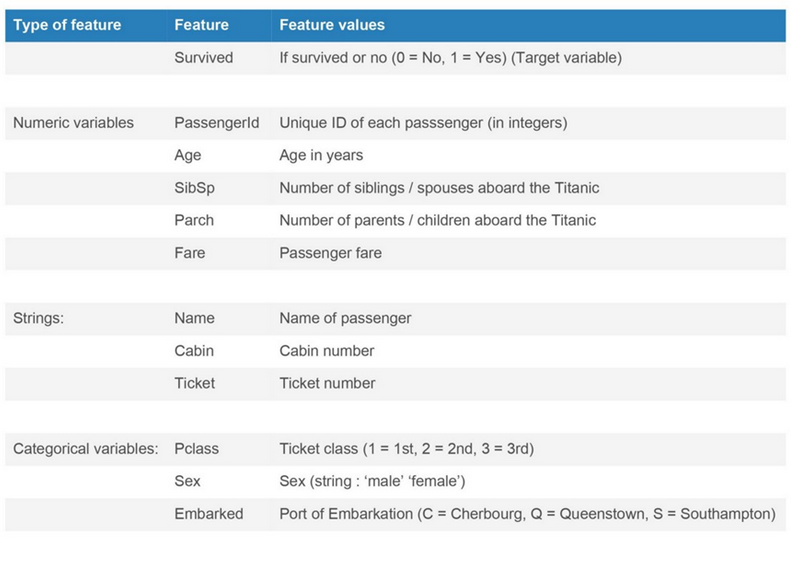

In [ ]:
# import pandas as pd
import numpy as np
import random as rnd
import pandas as pd

# visualization
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 11)

In [ ]:
df = pd.concat([train_df, test_df], axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.shape

(1309, 12)

### EDA

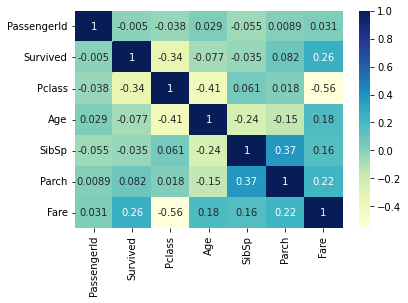

In [ ]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Fare and Pclass are negatively correlated (-0.55): 
- higher fares imply better ticket classes.
- Pclass and the survived feature are negatively correlated (-0.34) implying better the ticket class, higher the chance of survival.
- PClass and Age are negatively correlated (-0.37) implying higher the age, better the ticket class

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [ ]:
# less than 40% of passengers was Survived
df['Survived'].mean()

0.3838383838383838

### check nulls

In [ ]:
df.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df[df['Fare'].isna()== True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

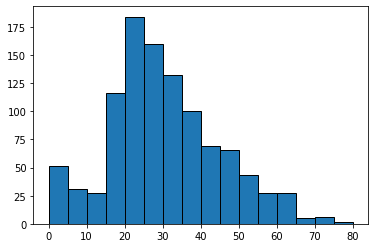

In [ ]:
bins= np.arange(0 , df['Age'].max()+1 , 5)

plt.hist(data=df, x='Age', bins= bins, edgecolor='black');

In [ ]:
df['Age'].min()

0.17

In [ ]:
median_age= df['Age'].median()
median_age

28.0

In [ ]:
df = df.drop(['Ticket','Name'], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S


## Missing data

Imputation

In [ ]:
# Impute Age with median
df['Age'].fillna(median_age, inplace=True)

In [ ]:
mode_embarked= df['Embarked'].mode()
mode_embarked

0    S
dtype: object

In [ ]:
# Impute Embarked col with mode
df['Embarked'].fillna(mode_embarked[0], inplace=True)

In [ ]:
# Cabin: 1014 out of 1309 are nulls
df = df.drop(['Cabin'], axis=1)

In [ ]:
# average Fare for pclass 3
fare_3 = df.groupby('Pclass').mean()['Fare'][3]
fare_3

13.302888700564973

In [ ]:
# Impute Fare with average Fare for pclass 3
df['Fare'].fillna(fare_3, inplace=True)

In [ ]:
# check nulls
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### check duplicates

In [ ]:
# no duplications
df.duplicated().any()

False

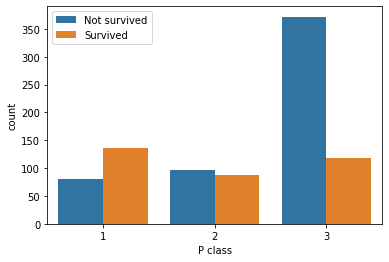

In [ ]:
# Pclass
sb.countplot(data = df, x = 'Pclass', hue = 'Survived')
plt.legend(['Not survived', 'Survived'])
plt.xlabel("P class");

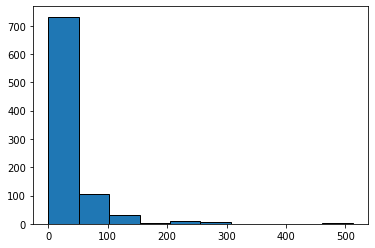

In [ ]:
# explore fare
plt.hist(data=df, x='Fare', edgecolor='black');

### Plotting a scatter plot between Age and Fare

Text(0, 0.5, 'Fare')

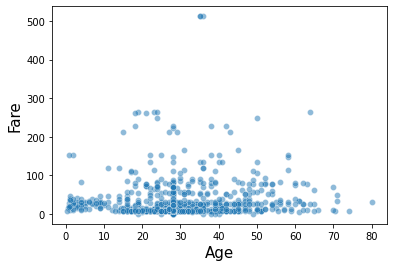

In [ ]:
sb.scatterplot(x=df['Age'], y=df['Fare'], alpha=0.5)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Fare', fontsize=15)

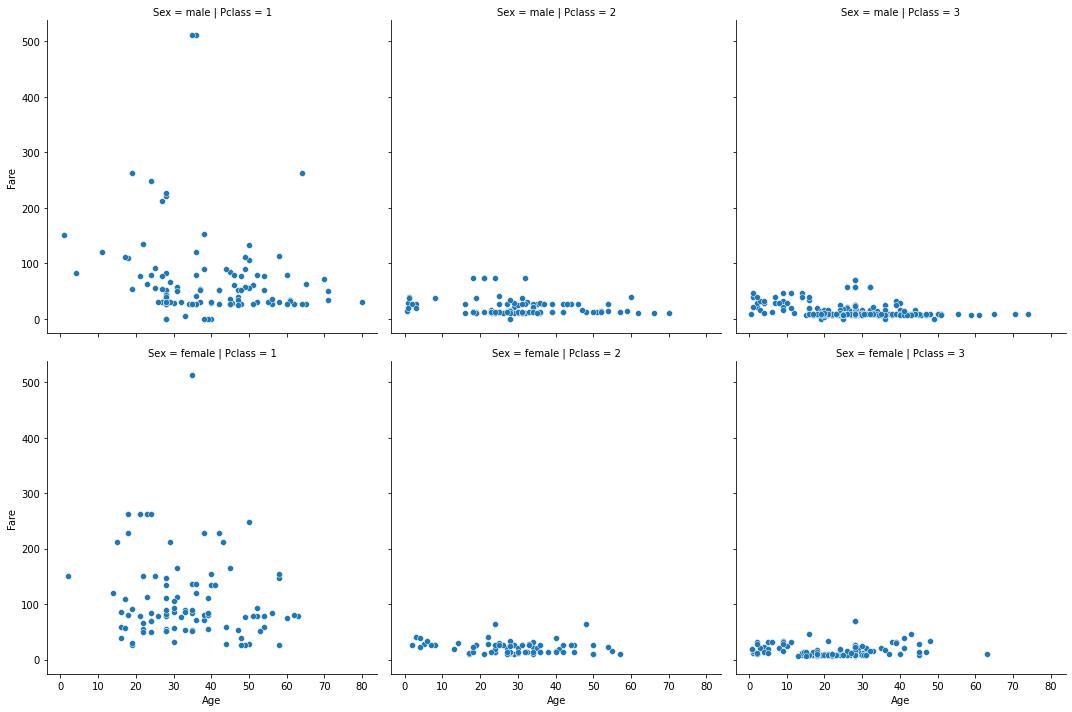

In [ ]:
sb.relplot(x='Age', y='Fare', data=df, row='Sex', col='Pclass')

The Fare for first-class female passengers was higher than male passengers.

Very few children traveled in first class. 

In [ ]:
df['Fare'].max()

512.3292

In [ ]:
df['Fare'].median()

14.4542

In [ ]:
df['Fare'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,Low,S
1,2,1.0,1,female,38.0,1,0,High,C
2,3,1.0,3,female,26.0,0,0,Mid,S
3,4,1.0,1,female,35.0,1,0,High,S
4,5,0.0,3,male,35.0,0,0,Mid,S


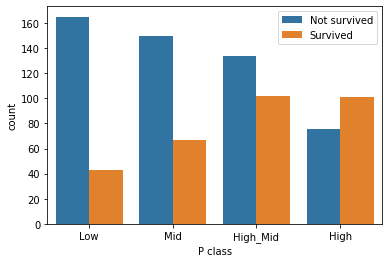

In [ ]:
sb.countplot(data = df, x = 'Fare', hue = 'Survived')
plt.legend(['Not survived', 'Survived'])
plt.xlabel("P class");

The higher a tourist paid, the higher would be his chances to survive.

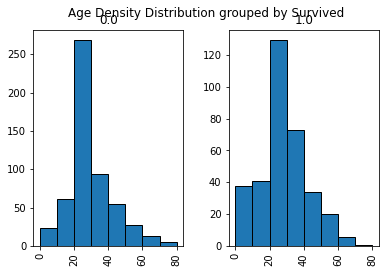

In [ ]:
bins= np.arange(0 , df['Age'].max()+1 , 10)
df.hist(column="Age",by="Survived", bins=bins, edgecolor='black')
plt.suptitle('Age Density Distribution grouped by Survived');

percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


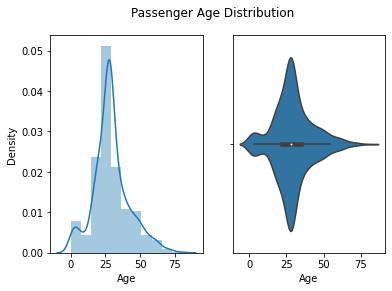

In [ ]:
ax=plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sb.distplot(df['Age'],bins=11)
ax.add_subplot(122)
sb.violinplot(df['Age']);
rcParams['figure.figsize'] = 7,5 ;

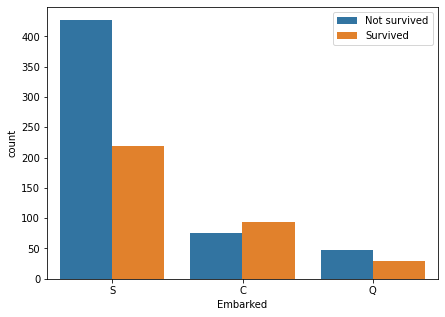

In [ ]:
sb.countplot(data = df, x = 'Embarked', hue = 'Survived')
plt.legend(['Not survived', 'Survived'])

People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

###  Embarked with Pclass

Text(0.5, 1.0, 'Proportion of Embarked per PcClass')

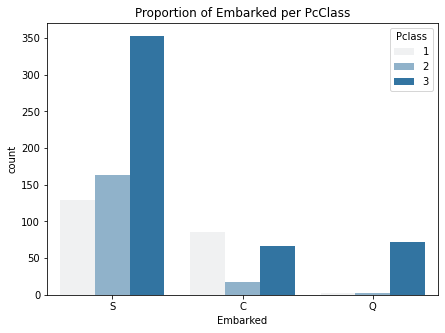

In [ ]:
sb.countplot(data = df, x = 'Embarked', hue = 'Pclass', color=sb.color_palette("Paired")[1])
plt.title('Proportion of Embarked per PcClass')

### Sex with Pclass

Text(0.5, 1.0, 'Proportion of sex per PcClass')

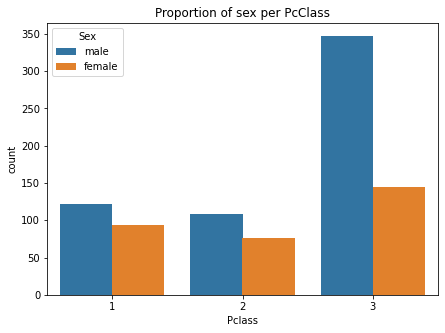

In [ ]:
sb.countplot(data = df, x = 'Pclass', hue = 'Sex')
plt.title('Proportion of sex per PcClass')

### Sex with Survived

Text(0.5, 1.0, 'Proportion of sex per Survived')

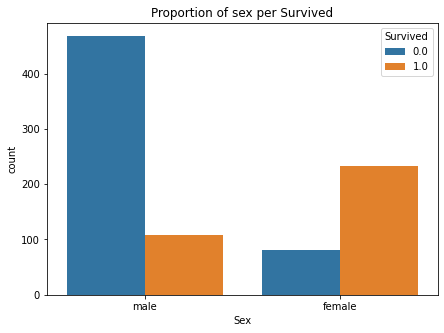

In [ ]:
sb.countplot(data = df, x = 'Sex', hue = 'Survived')
plt.title('Proportion of sex per Survived')

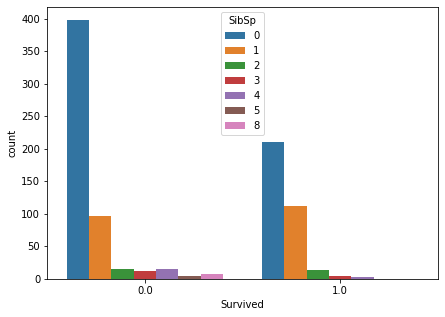

In [ ]:

sb.countplot(data = df, x = 'Survived', hue = 'SibSp')

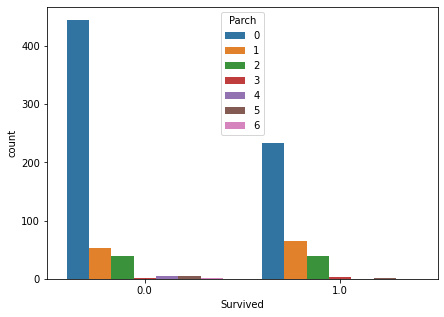

In [ ]:
sb.countplot(data = df, x = 'Survived', hue = 'Parch')

who survived had a median of around 1 family member, while those who did not had, had lesser or no family

### Converting categorical feature to numeric

In [ ]:
#df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,Low,S
1,2,1.0,1,female,38.0,1,0,High,C
2,3,1.0,3,female,26.0,0,0,Mid,S
3,4,1.0,1,female,35.0,1,0,High,S
4,5,0.0,3,male,35.0,0,0,Mid,S


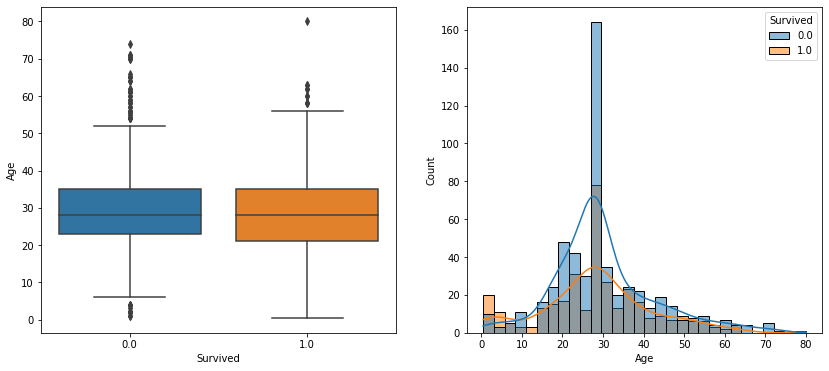

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (14, 6))
sb.boxplot(data = df, 
            y = 'Age', 
            x = 'Survived', ax = axs[0])

sb.histplot(data = df, 
             x = 'Age',
             hue = 'Survived', kde = True, ax = axs[1])